# 📊 Student Performance Dataset Overview

## 📌 Project Objective
The goal of this analysis is to examine student performance data to identify key factors that influence academic success. By applying data cleaning, exploratory data analysis (EDA), and statistical techniques, the goal is to uncover meaningful patterns and insights that can guide interventions to improve student outcomes.

## 📌 Dataset Description¶
This dataset contains student academic records to analyze performance trends, study habits, and influencing factors.

In [5]:
# importing important Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime
import numpy as np
from pandas import DataFrame
from typing import List
from scipy.stats import skew
import pingouin as pg
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency, pearsonr
import warnings 
warnings.filterwarnings('ignore')

In [6]:
#loading the dataset 
df = pd.read_csv('Students_Grading_Dataset.csv')
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [7]:
# Checking the Shape of the data 
df.shape

(5000, 23)

- The dataset contains 5000 rows and 23 columns

### Data Cleaning And Preprocessing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

- The dataset contains three types of datatypes namely float, object and integer.
- There are few columns which contains null values such as Attendence, Assignments_avg and parent_education_level we will examine this in deep later

In [12]:
# Checking the number of null values in each column 
df.isnull().sum()[df.isnull().sum()>0]

Attendance (%)             516
Assignments_Avg            517
Parent_Education_Level    1794
dtype: int64

<Axes: >

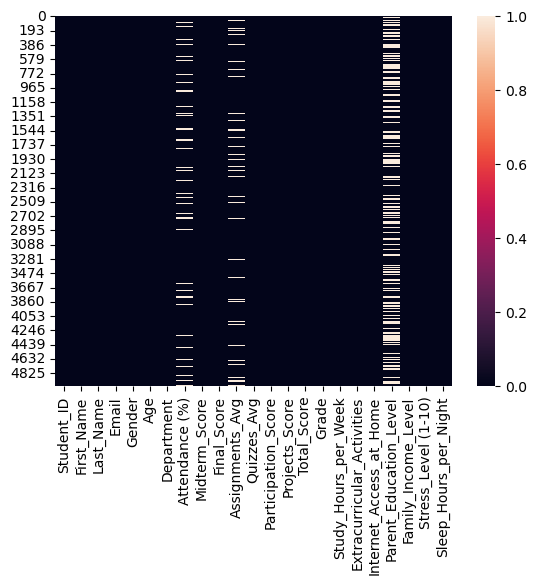

In [13]:
sns.heatmap(df.isnull())

- We can confirm from the visualization also that columns Attendance (%) ,Assignments_Avg, 
Parent_Education_Level contains null values 

In [15]:
# Checking Duplicates in the data 
print(f"Number of Duplicates in the Data :-{df.duplicated().sum()}" )

Number of Duplicates in the Data :-0


- No duplicate values present in the data

In [17]:
df.sample(20)

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
2836,S3836,Emma,Jones,student2836@university.com,Female,21,Business,81.50,84.33,67.40,...,85.27,88.53,C,21.0,No,Yes,High School,Medium,6,7.2
1553,S2553,Maria,Brown,student1553@university.com,Female,23,Mathematics,50.66,66.82,89.24,...,99.19,72.44,F,19.1,No,No,Master's,Medium,9,5.0
4149,S5149,Maria,Jones,student4149@university.com,Male,21,Engineering,71.94,75.43,71.56,...,61.21,79.81,F,16.2,Yes,Yes,Bachelor's,Low,5,7.5
4160,S5160,Omar,Jones,student4160@university.com,Male,20,Mathematics,81.13,73.70,61.42,...,53.87,74.43,F,5.4,No,Yes,Master's,Low,2,5.1
2167,S3167,Omar,Brown,student2167@university.com,Male,23,CS,97.83,55.86,40.28,...,72.57,70.05,A,23.0,No,Yes,Bachelor's,Low,5,5.9
4324,S5324,Emma,Davis,student4324@university.com,Female,22,CS,95.32,85.56,45.53,...,62.84,66.25,A,28.8,No,Yes,NaN,Low,1,6.8
2926,S3926,Maria,Davis,student2926@university.com,Male,22,Engineering,76.14,75.12,92.67,...,86.98,87.71,B,18.2,No,Yes,NaN,High,10,4.2
1198,S2198,John,Davis,student1198@university.com,Male,18,CS,64.78,78.64,59.26,...,99.56,64.46,B,29.0,No,Yes,NaN,Low,3,8.8
238,S1238,John,Smith,student238@university.com,Female,24,Engineering,NaN,85.97,98.54,...,63.88,55.83,B,20.9,No,No,NaN,Low,10,8.8
3764,S4764,Omar,Johnson,student3764@university.com,Female,18,Engineering,61.83,90.86,67.95,...,57.09,90.24,B,26.3,Yes,Yes,High School,Medium,9,6.1


In [18]:
# Categorical Columns 
Categorical_col = df.select_dtypes(include=['object']).drop(['Student_ID','First_Name','Last_Name','Email'],axis=1).columns
Categorical_col

Index(['Gender', 'Department', 'Grade', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level'],
      dtype='object')

In [19]:
# Checking Department Name 
df['Department'].unique()

array(['Engineering', 'Business', 'Mathematics', 'CS'], dtype=object)

In [20]:
# Replacing CS to Computer Science 
df['Department'].replace({'CS':'Computer Science'},inplace=True)

In [21]:
df['Parent_Education_Level'].unique()

array(['High School', nan, "Master's", 'PhD', "Bachelor's"], dtype=object)

- We will conver nan to Unknown

In [23]:
# Checking Grade 
df['Grade'].unique()

array(['F', 'A', 'D', 'B', 'C'], dtype=object)

In [24]:
# Checking Gender 
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [25]:
# Checking family income level 
df['Family_Income_Level'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [26]:
df['Extracurricular_Activities'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
df['Internet_Access_at_Home'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
# Numerical Columns 
Numerical_col = df.select_dtypes(include=['number']).columns
Numerical_col

Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night'],
      dtype='object')

In [29]:
# Checking If their is any Negative Value 
(df[Numerical_col]<0).sum()

Age                      0
Attendance (%)           0
Midterm_Score            0
Final_Score              0
Assignments_Avg          0
Quizzes_Avg              0
Participation_Score      0
Projects_Score           0
Total_Score              0
Study_Hours_per_Week     0
Stress_Level (1-10)      0
Sleep_Hours_per_Night    0
dtype: int64

- No negative values present in the dataset

- We are using Knn imputation to fill the missing values for better performance 

In [32]:
# Selecting the revent features 
features_for_imputation = [
    "Age","Midterm_Score", "Final_Score", "Quizzes_Avg", 
    "Participation_Score", "Projects_Score", "Total_Score", 
    "Study_Hours_per_Week", "Stress_Level (1-10)", "Sleep_Hours_per_Night"
]

In [33]:
# Target columns for imputation 
columns_to_impute = ['Assignments_Avg','Attendance (%)']

In [34]:
# Combining features to get all selected columns 
selected_features = features_for_imputation + columns_to_impute

In [35]:
# Extract the subset from the dataframe 
df_subset = df[selected_features]

In [36]:
# Normalize data for better performance 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_subset)

In [37]:
#Applying Knn Imputation 
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = knn_imputer.fit_transform(df_scaled)

In [38]:
# Convert back to orginal dataframe 
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed),columns=selected_features)

In [39]:
# Assigning imputed value back to original dataframe 
df[columns_to_impute] = df_imputed[columns_to_impute]

In [40]:
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [41]:
#Imputing the values in parent education level column 

In [42]:
df['Parent_Education_Level'].fillna('Unknown',inplace=True)

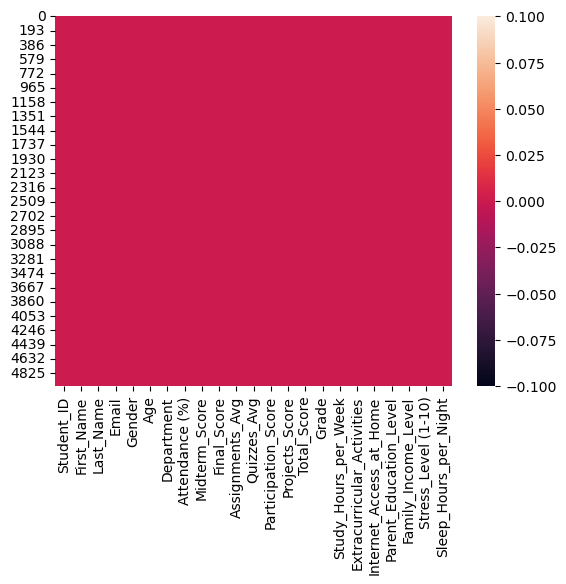

In [43]:
sns.heatmap(df.isnull())
plt.show()

- From the above visualization it is confirm that we filled all the missing values.

In [45]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.414560,70.326844,69.640788,74.783282,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,13.765823,17.213209,17.238744,13.809349,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,64.515000,55.457500,54.667500,63.320000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.625000,70.510000,69.735000,74.790000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,86.400000,84.970000,84.500000,85.842500,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


- Students are generally young adults, with an average age of 21.
- The mean scores for Midterm, Final, Assignments, Quizzes, Projects, and Total Score are all around 70-75%, suggesting a generally moderate performance level.
- Standard deviations for scores are relatively high (around 13-17%), indicating a wide range of academic performance among students.
- Participation scores have a low average (around 5 out of 10) and a high standard deviation, suggesting significant variation in student engagement.
- Students report studying an average of 17.66 hours per week, but this varies widely (std dev of 7.28).
- The average stress level is moderately high (5.48 out of 10), with a reasonable amount of variation
- Students get an average of 6.49 hours of sleep per night, with some variation.
- The average attendance rate is around 75%, but there's considerable variation (std dev of 13.77%).
- In most categories, the median and mean are close, suggesting a relatively symmetrical distribution of data.

### Feature Engineering 

In [48]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,Unknown,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,Computer Science,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [49]:
#categorization of scores
def score_category(score:float)->str:
    if score >=85:
        return 'High'
    elif score >=60: 
        return 'Medium'
    else: 
        return 'Low'

In [50]:
#categorization of study hours 
def categorize_study_hours(hours:int) ->str:
    if hours < 5: 
        return 'Low (0-5)'
    elif hours < 10: 
        return 'Moderate (5-10)'
    elif hours <20: 
        return 'High (10-20)'
    else:
        return 'Very High (20+)'
        

In [51]:
#get categorise of the score
df['Total_Score_Category'] = df['Total_Score'].apply(score_category)
df['Midterm_Score_category'] = df['Midterm_Score'].apply(score_category)

In [52]:
df['Study_Hour_Category'] = df['Study_Hours_per_Week'].apply(categorize_study_hours)

In [53]:
# Creating Full Name column from First and last name 
df['Full Name'] = df['First_Name'] + ' ' + df['Last_Name']

In [54]:
#Final_Performance_Score: A weighted score combining all assessment types in data
df['Final_Performance_Score'] = (df['Midterm_Score']*0.3 + df['Final_Score']*0.4 + 
                                 df['Assignments_Avg']*0.1 + df['Quizzes_Avg']*0.1 + 
                                 df['Projects_Score']*0.1)

In [55]:
# After feature engineering
Categorical_Col = df.select_dtypes(include=['object']).drop(['Student_ID','First_Name','Last_Name','Email'], axis = 1).columns
Categorical_Col

Index(['Gender', 'Department', 'Grade', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level', 'Total_Score_Category', 'Midterm_Score_category',
       'Study_Hour_Category', 'Full Name'],
      dtype='object')

In [56]:
Categorical_Col = Categorical_Col.drop('Full Name') 
Categorical_Col

Index(['Gender', 'Department', 'Grade', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level', 'Total_Score_Category', 'Midterm_Score_category',
       'Study_Hour_Category'],
      dtype='object')

In [57]:
#After feature engineering
Numerical_col = df.select_dtypes(include=['number']).columns
Numerical_col

Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night',
       'Final_Performance_Score'],
      dtype='object')

### EDA And Hypothesis Testing

In [59]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Total_Score_Category,Midterm_Score_category,Study_Hour_Category,Full Name,Final_Performance_Score
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,Yes,High School,Medium,5,4.7,Low,Low,Moderate (5-10),Omar Williams,64.0550
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,Yes,Unknown,Medium,4,9.0,Low,High,High (10-20),Maria Brown,69.5246
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,Yes,Master's,Low,6,6.2,Medium,Medium,Very High (20+),Ahmed Jones,80.3060
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,Yes,High School,High,3,6.7,Medium,Low,Very High (20+),Omar Williams,71.7580
4,S1004,John,Smith,student4@university.com,Female,23,Computer Science,54.18,46.59,78.89,...,Yes,High School,High,2,7.1,Medium,Low,High (10-20),John Smith,70.4300


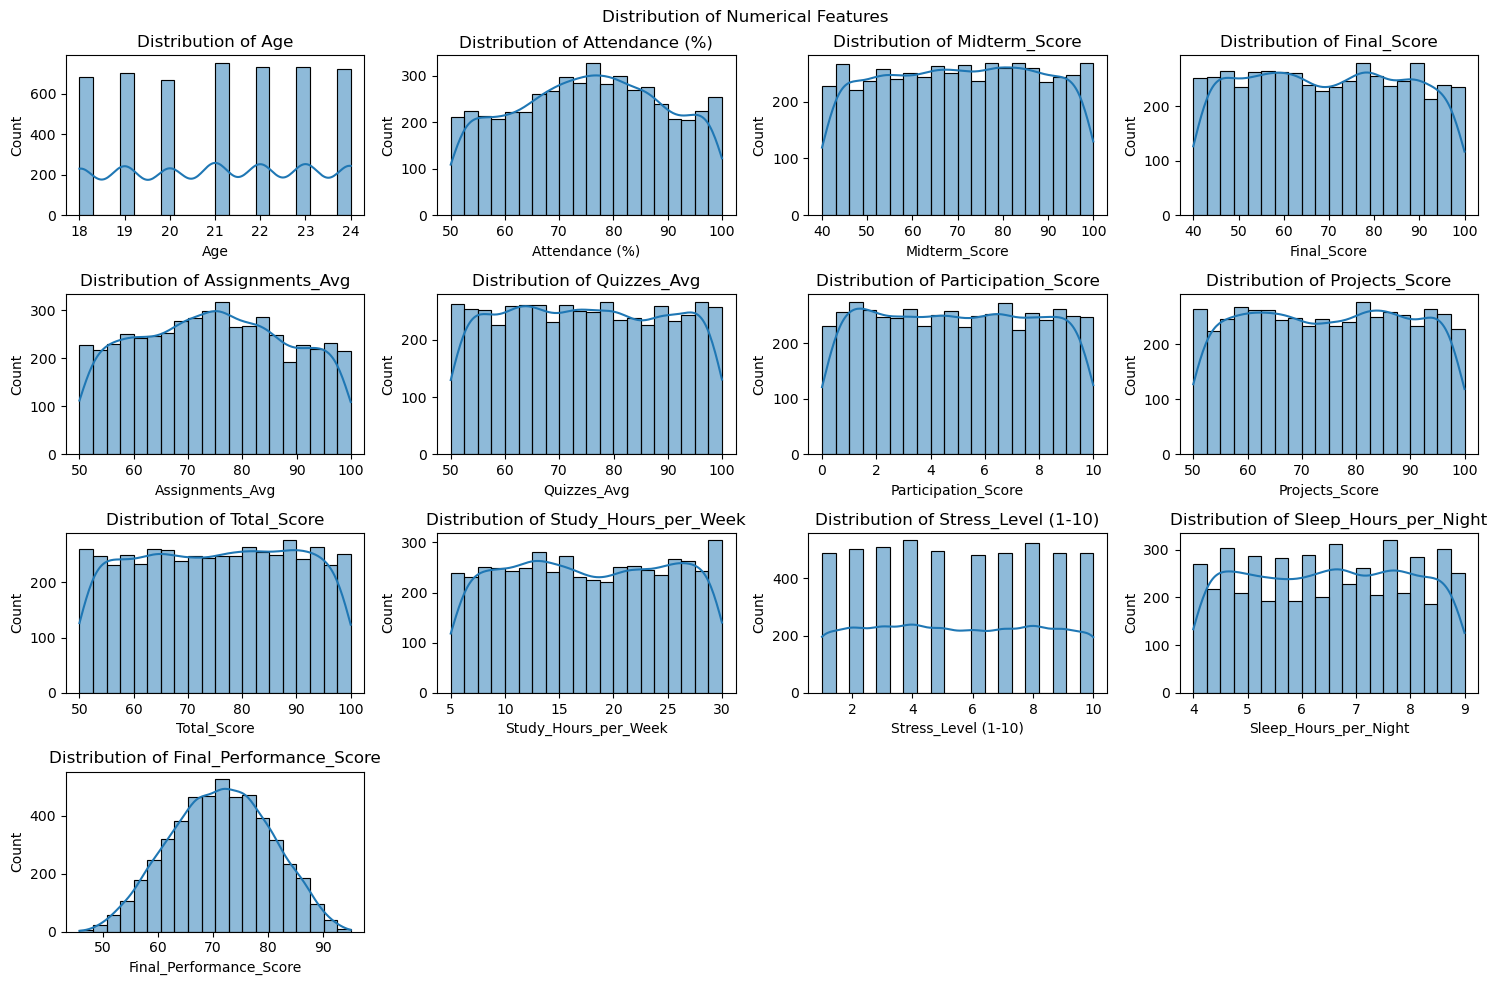

In [60]:
#histogram for numerical data 
plt.figure(figsize=(15,10))
for i,col in enumerate(Numerical_col, 1): 
    plt.subplot(4, 4, i)
    sns.histplot(df[col],bins=20,kde=True)
    plt.title(f"Distribution of {col}")

plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

- Age Distribution: The distribution appears uniform, suggesting an equal number of students across different ages.
- Attendance (%): Most students have attendance between 60% and 95%, with a peak around 80%.
- Midterm Score: The distribution is fairly uniform, indicating students performed across a wide range of scores.
- Final Score: Similar to midterm scores, final scores are well-distributed without strong skewness.
- Assignments Average: Slightly right-skewed, meaning more students scored higher in assignments.
- Quizzes Average: A fairly uniform distribution, with no dominant score range.
- Participation Score: Evenly spread, meaning students participated across different levels.
- Projects Score: Distributed similarly to quizzes and assignments, with no extreme skews.
- Total Score: Broadly distributed, indicating variation in overall student performance.
- Study Hours per Week: Most students study between 10 to 25 hours, peaking around 15 hours.
- Stress Level (1-10): Uniformly spread, showing diverse stress levels among students.
- Sleep Hours per Night: Most students sleep between 5-8 hours, with no extreme outliers.
- Final Performance Score: Follows a normal distribution, implying most students cluster around the average performance.

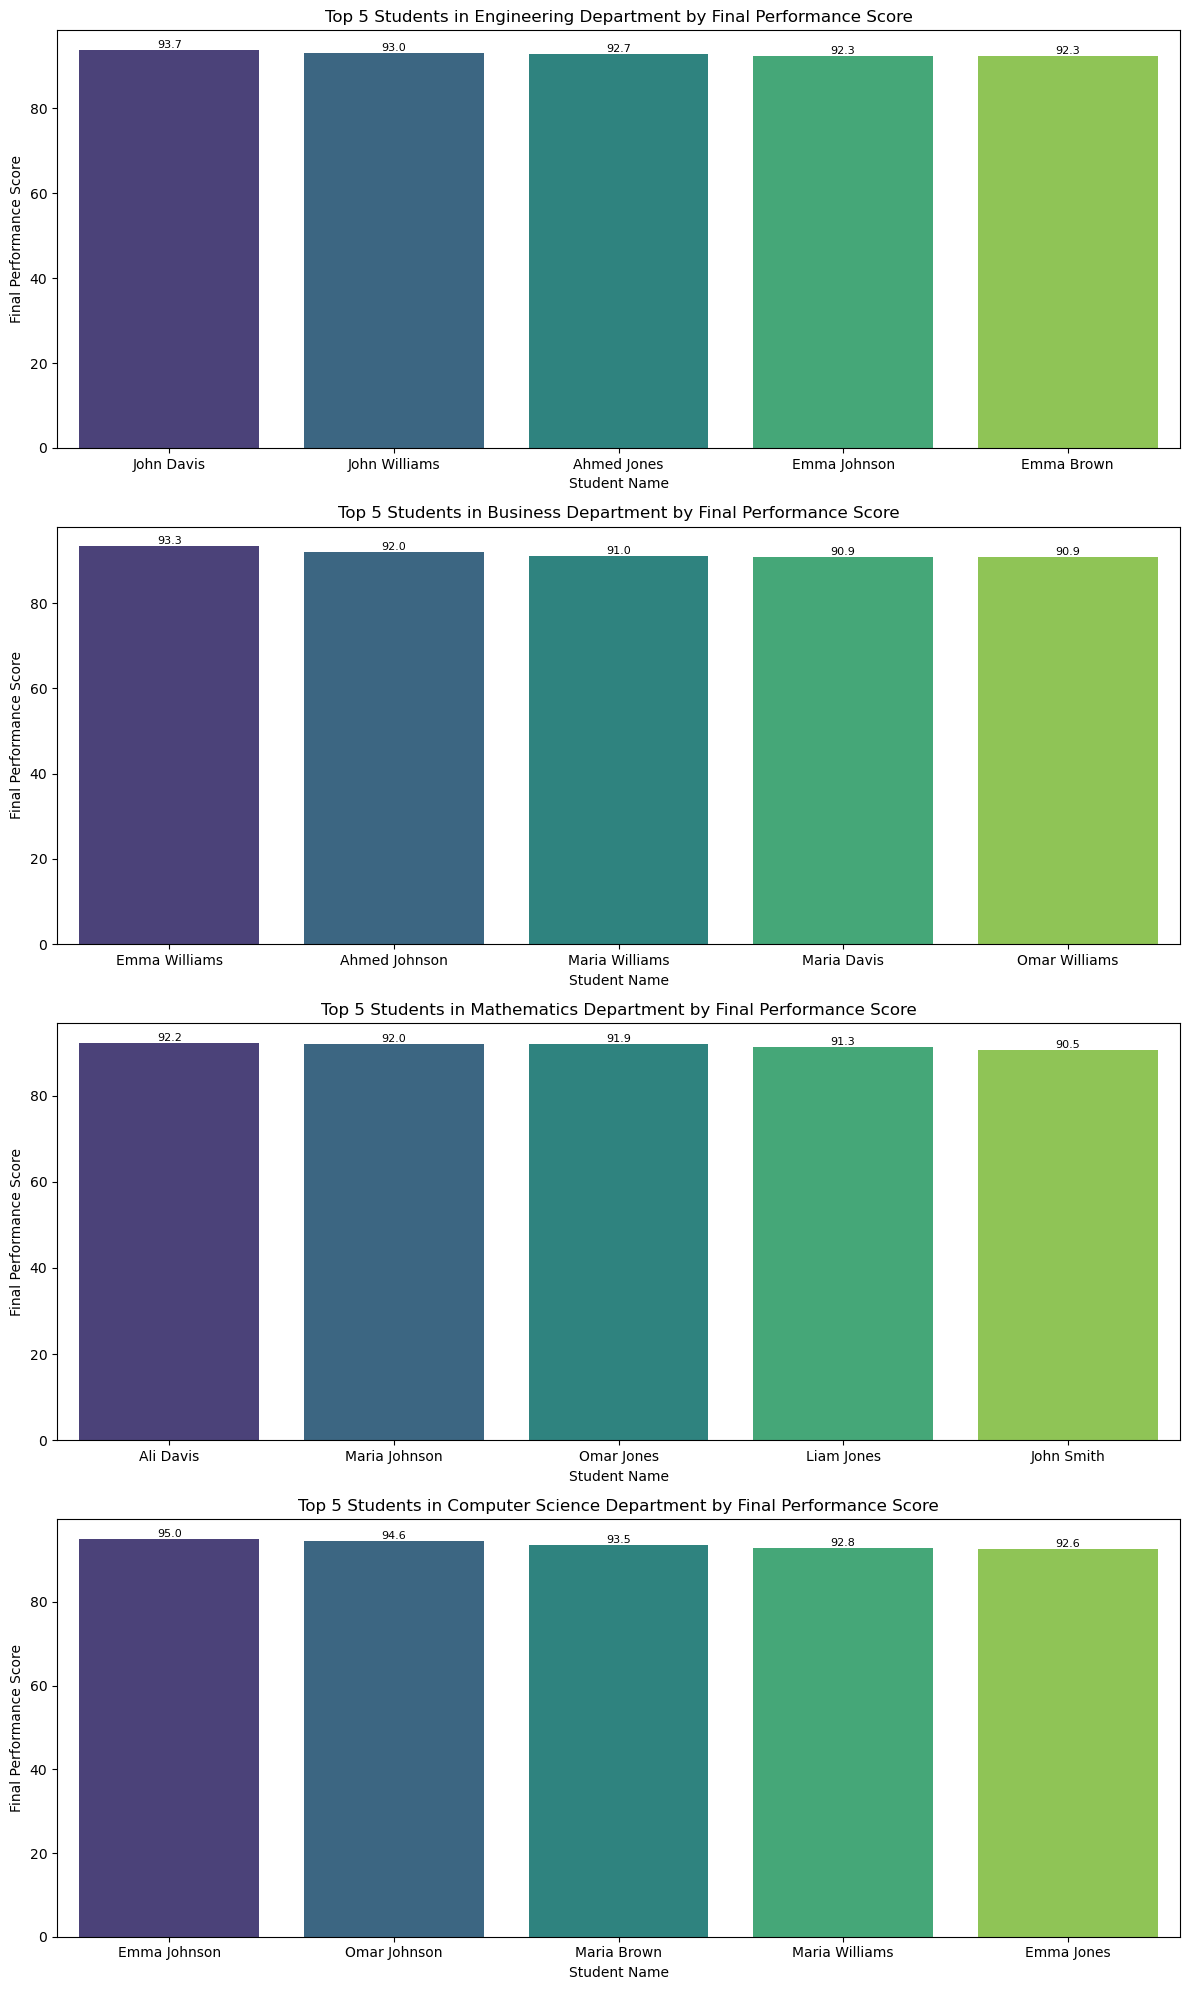

In [65]:
# Top 5 students in each department 

#Get Unique Department
departments = df['Department'].unique()

# Set figure size
plt.figure(figsize=(12, len(departments) * 5))  



#Loop in each department
for i, dept in enumerate(departments,1): 
    top_students = df[df['Department'] == dept].nlargest(5, 'Final_Performance_Score')

    # Create Subplot for this department 
    plt.subplot(len(departments),1,i)
    ax = sns.barplot(data = top_students,x='Full Name', y ='Final_Performance_Score', palette='viridis')

     # Annotate bars with scores
    for bar, score in zip(ax.patches, top_students["Final_Performance_Score"]):
        ax.annotate(f'{score:.1f}', 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black')

    # Title and labels
    plt.title(f"Top 5 Students in {dept} Department by Final Performance Score")
    plt.xlabel("Student Name")
    plt.ylabel("Final Performance Score")
    

plt.tight_layout()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.title('Feature Correlation Heatmap')

- Midterm Score & Final Performance Score (0.58): Moderate positive correlation, indicating better midterm scores tend to result in better final performance.
- Final Score & Final Performance Score (0.77): Strong positive correlation, suggesting final scores heavily influence overall performance.
- Assignments Avg & Final Performance Score (0.16): Weak positive correlation, meaning assignment scores have a slight impact on overall performance.
- Quizzes Avg & Final Performance Score (0.16): Similar weak correlation, implying quizzes alone don't significantly determine final performance.
- Projects Score & Final Performance Score (0.17): Slightly higher than assignments and quizzes, but still weak.
- Participation Score & Final Performance Score (0.008): Almost no correlation, indicating participation does not significantly impact final performance.
- Attendance & Final Performance Score (-0.037): Slight negative correlation, meaning attendance percentage does not necessarily predict performance.
- Study Hours per Week & Final Performance Score (0.016): Very weak correlation, suggesting study hours alone don’t guarantee better performance.

### Outliers Treatment

In [ ]:
plt.figure(figsize=(15,10))

palette = sns.color_palette('viridis',len(Numerical_col))

for i, (col,color) in enumerate(zip(Numerical_col,palette),1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[col],color=color)
    plt.title(f"BoxPlot Of{col}")
plt.tight_layout()

- It is clear from the boxplot that no outliers present in the data 

In [ ]:
# Gender Distribution 
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%', colors=['#ff9999','#66b3ff'],startangle=90,shadow=True,explode=(0.05,0.05))
plt.title('Gender Distribution')
plt.show()

- There is no much difference in the distribution between male and female counts

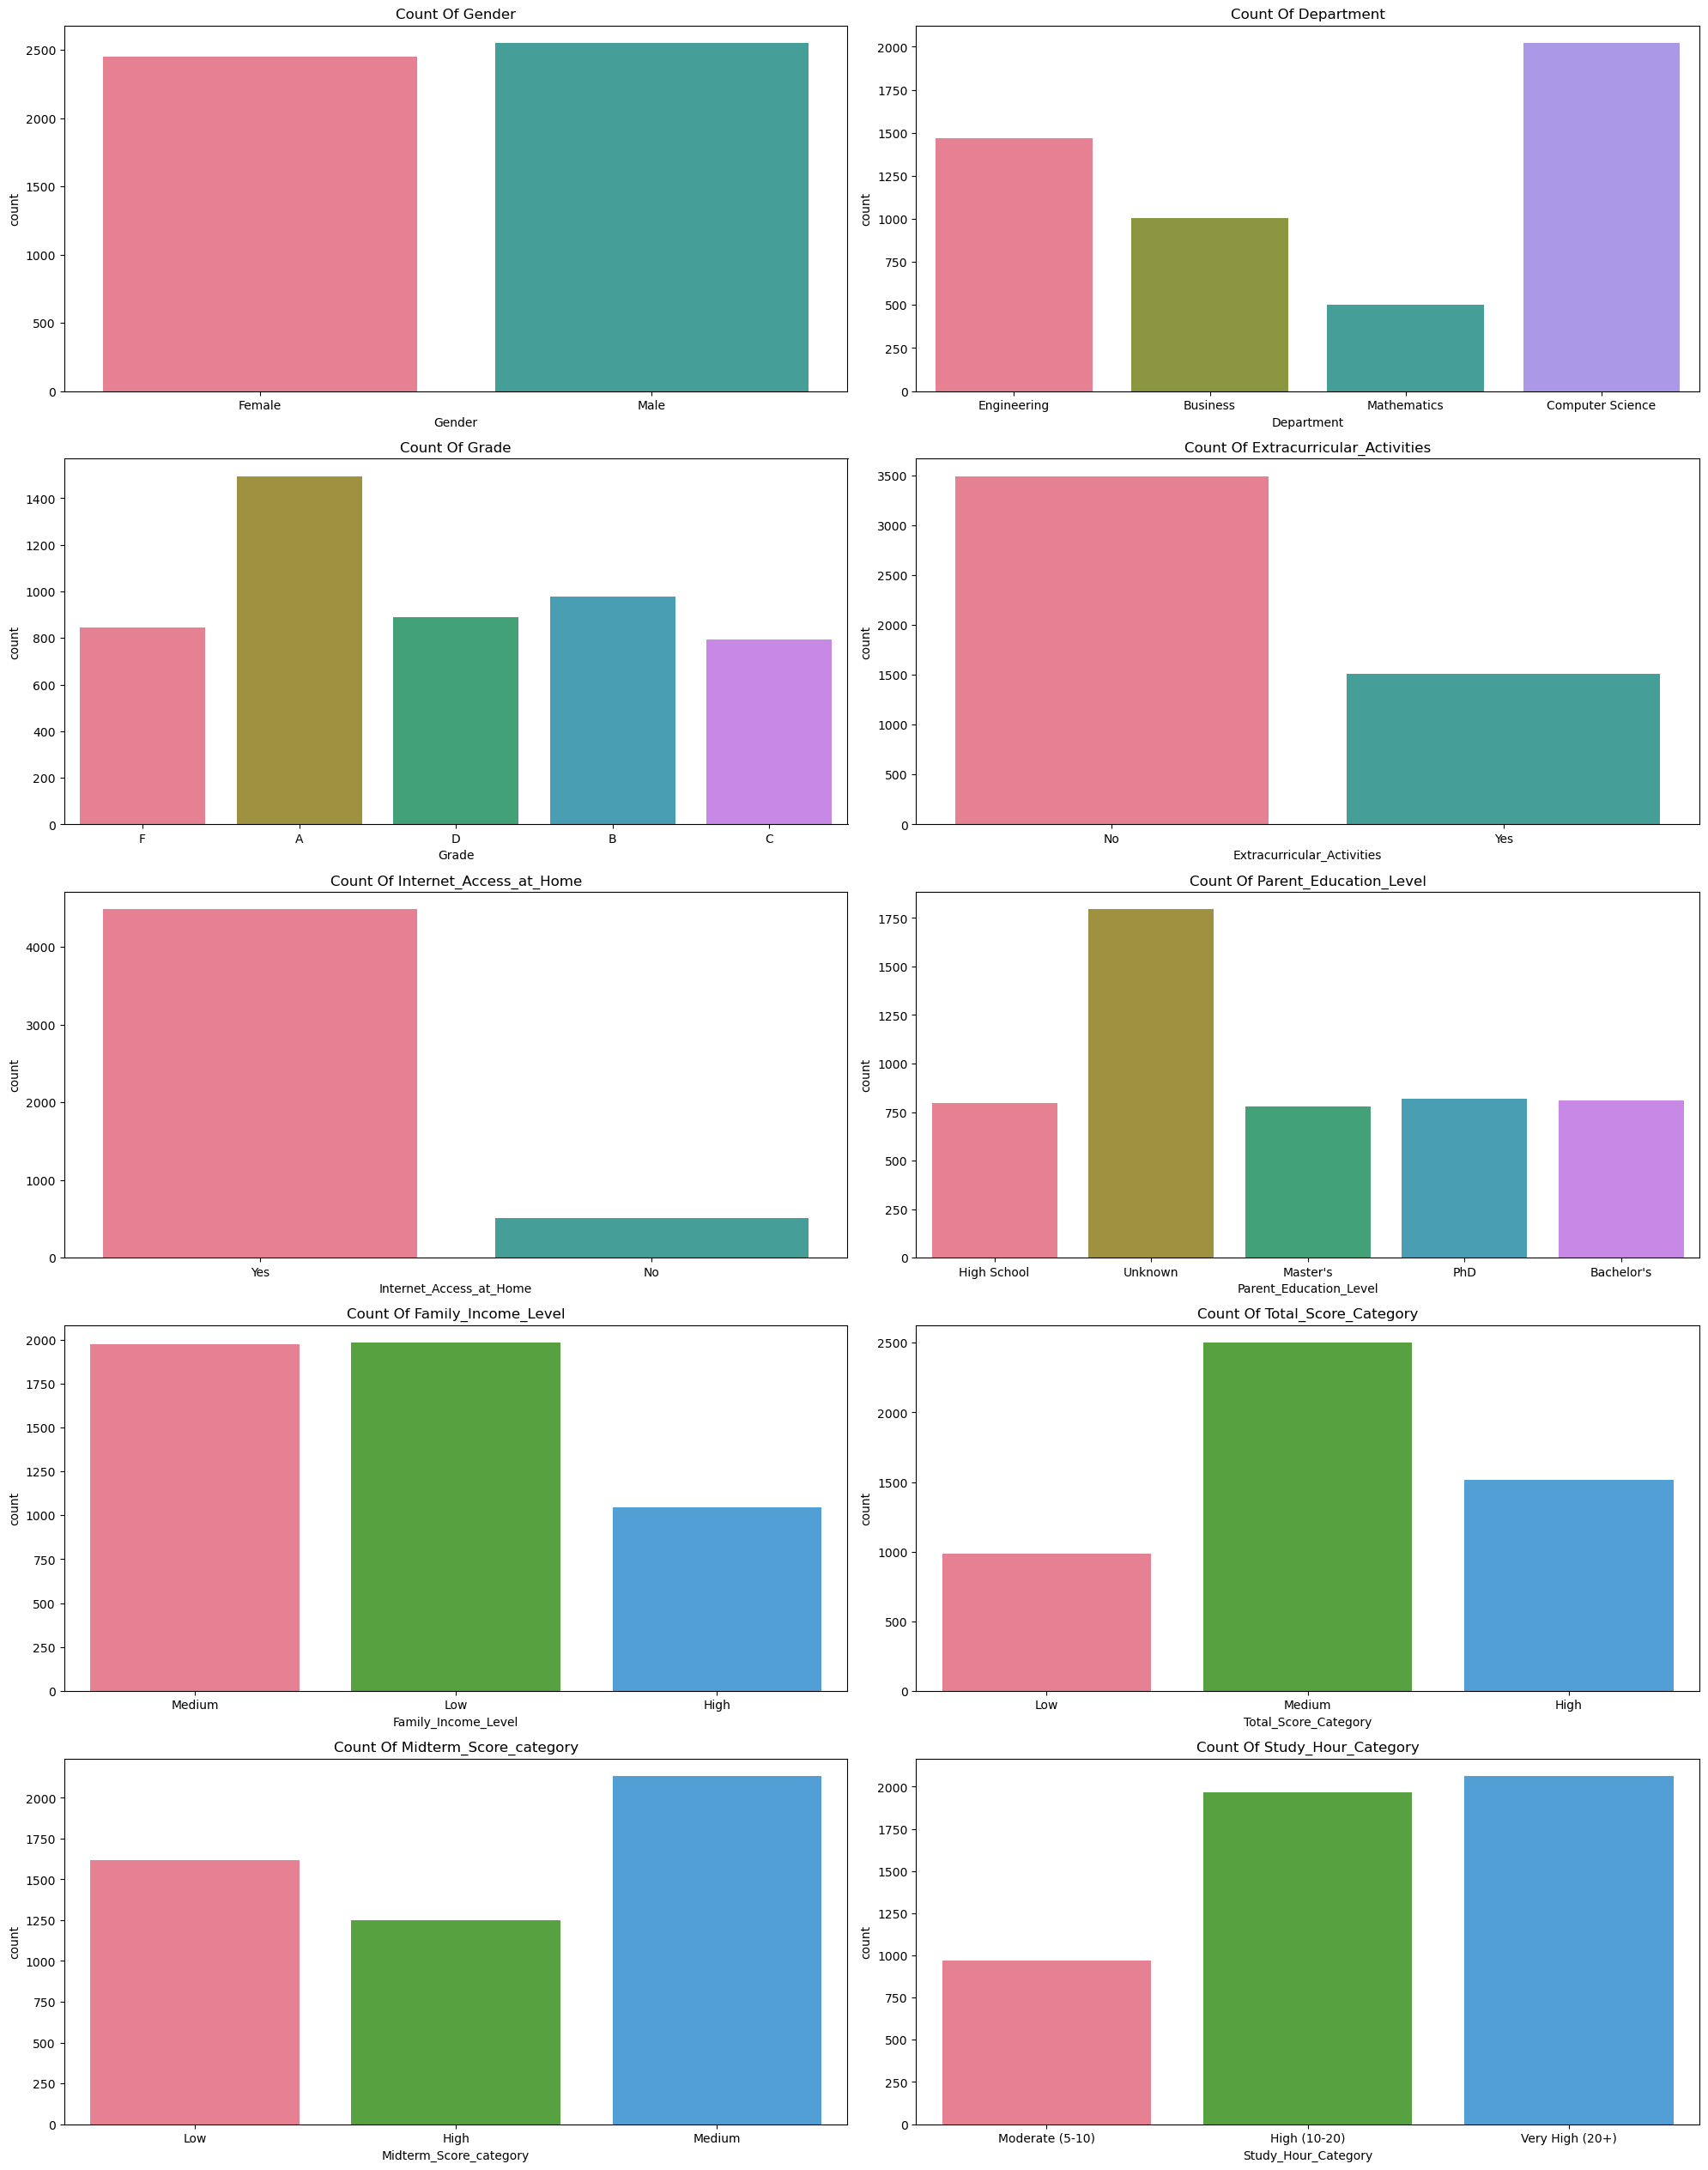

In [73]:
#Distribution of categorical Features
plt.figure(figsize=(20,30))

palette = sns.color_palette("husl",len(Numerical_col))

#Create bar plot for each categorical column 
for i, col in enumerate(Categorical_Col,1): 
    plt.subplot(6,2,i)
    sns.countplot(data=df,x=col,palette="husl")
    plt.title(f"Count Of {col}")
plt.tight_layout()

- Gender: The dataset has a nearly equal distribution of males and females.
- Department: Most students belong to the Computer Science department, followed by Engineering, while Business has the least representation.
- Grade: Grade A has the highest count, while Grade C has the lowest, indicating good overall student performance.
- Extracurricular Activities: More students do not participate in extracurricular activities than those who do.
- Internet Access at Home: The majority of students have internet access at home, while very few lack it.
- Parent Education Level: The highest count is for "Unknown," meaning many students did not report their parents' education. Among known values, High School is the most common.
- Family Income Level: Most families fall in the Medium and Low income categories, with fewer in the High income bracket.
- Total Score Category: Most students fall in the Medium and High score range, with fewer in the Low category.
- Midterm Score Category: Medium scores are the most common, while High and Low scores are nearly equal.
- Study Hour Category: Moderate (6-10 hours) study hours are most frequent, while Very High (>10 hours) has a considerable count.

* Majority of students perform well (Grade A, Medium/High total scores).
* Most students have internet access at home, which might contribute to better performance.
* Extracurricular participation is lower, which could mean students prioritize academics over activities.
* Computer Science is the most popular department.
* Parental education is often unreported, but High School education is most common among reported cases.

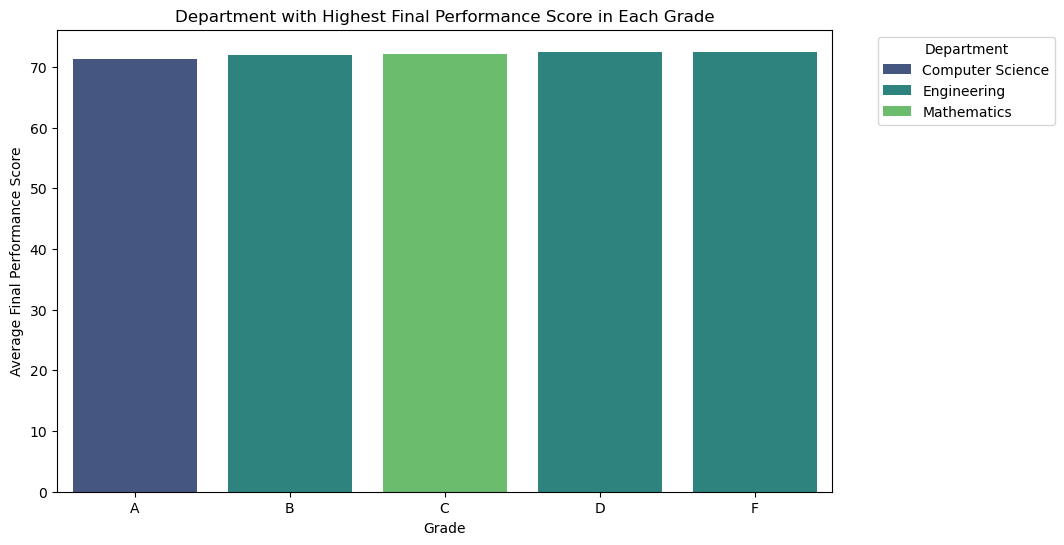

In [77]:
# Group by Grade and Department, then calculate the mean Final Performance Score
grade_department_avg = df.groupby(['Grade', 'Department'])['Final_Performance_Score'].mean().reset_index()

# Get the department with the highest score for each grade
top_departments = grade_department_avg.loc[grade_department_avg.groupby('Grade')['Final_Performance_Score'].idxmax()]

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=top_departments, x="Grade", y="Final_Performance_Score", hue="Department", palette="viridis")

# Add labels and title
plt.xlabel("Grade")
plt.ylabel("Average Final Performance Score")
plt.title("Department with Highest Final Performance Score in Each Grade")
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left');

### Hypothesis Testing 

#### ANOVE Test- 
H0: There is no significant difference in final performance scores across departments

- 
HA: At least one department has a significantly different final performance score.

In [83]:
# Perform Anova
anova_result = pg.anova(data=df, dv='Final_Performance_Score',between='Department',detailed=True)

#Interpretation
if anova_result['p-unc'][0] <0.05:
    print("There is significant difference in final performance score across departments.")
else: 
    print("There is no significant difference in final performance score across departments.")

There is no significant difference in final performance score across departments.


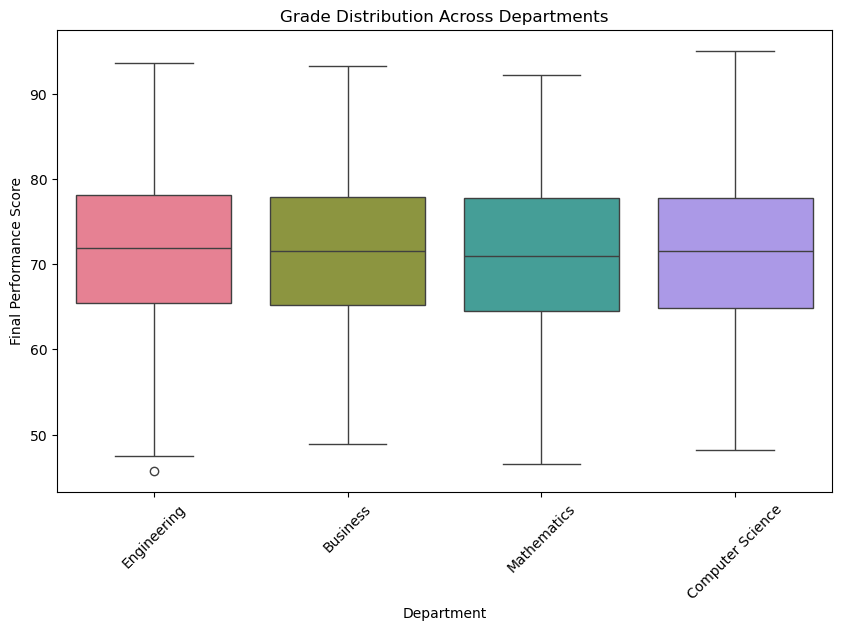

In [85]:
# Grade Differences Across Departments to Visualize the prove of the hypothesis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Final_Performance_Score', data=df, palette='husl')
plt.title('Grade Distribution Across Departments')
plt.xticks(rotation=45)
plt.ylabel('Final Performance Score');

#### Independent t-test
- 
H0: There is no significant difference in final performance scores between students with and without internet acces. 
s- 
HA: Students with internet access have significantly higher final performance scores

In [94]:
#Grouping data 
internet_access_yes = df[df['Internet_Access_at_Home']=='Yes']['Final_Performance_Score']
internet_access_no = df[df['Internet_Access_at_Home']=='No']['Final_Performance_Score']

# Performing independent t-test (one-tailed: checking if students with internet access perform better)
ttest_result = pg.ttest(internet_access_yes, internet_access_no, alternative='greater')

# Hypothesis decision
if ttest_result['p-val'].values[0] < 0.05:
    print("Reject the null hypothesis: Students with internet access have significantly higher final performance scores.")
else:
    print("Fail to reject the null hypothesis: No significant difference in final performance scores based on internet access.")

Fail to reject the null hypothesis: No significant difference in final performance scores based on internet access.


Text(0, 0.5, 'Final Performance Score')

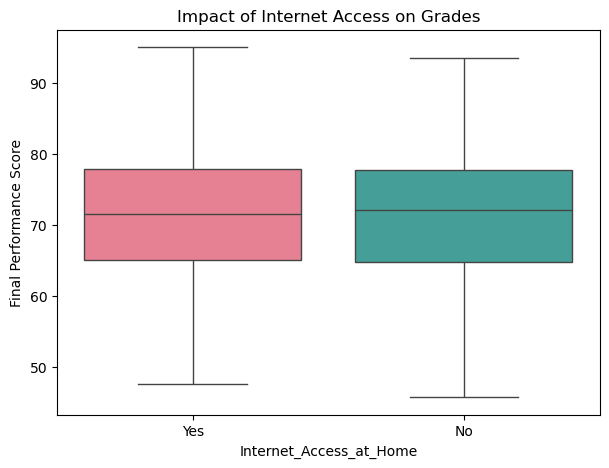

In [96]:
# Visualize the proof of the hypothesis that no difference whether there internet or not
plt.figure(figsize=(7, 5))
sns.boxplot(x='Internet_Access_at_Home', y='Final_Performance_Score', data=df, palette='husl')
plt.title('Impact of Internet Access on Grades')
plt.ylabel('Final Performance Score')

In [98]:
# Compute Pearson correlation between Stress_Level and Sleep_Hours
correlation_result = pg.corr(df['Stress_Level (1-10)'], df['Sleep_Hours_per_Night'])

# Extract the correlation coefficient and p-value
r_value = correlation_result['r'].values[0]  # Correlation coefficient
p_value = correlation_result['p-val'].values[0]  # p-value

# Hypothesis decision
if p_value < 0.05:
    if r_value < 0:
        print("Reject the null hypothesis: There is a significant negative correlation between stress levels and sleep hours.")
    else:
        print("Reject the null hypothesis: There is a significant correlation, but it's not negative.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between stress levels and sleep hours.")

Fail to reject the null hypothesis: No significant correlation between stress levels and sleep hours.


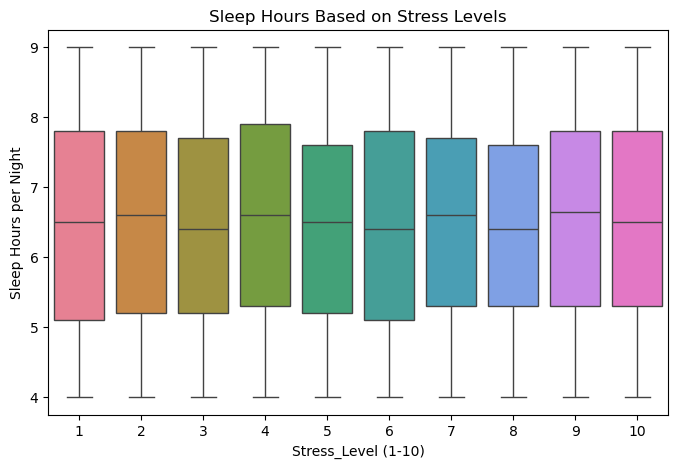

In [100]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Stress_Level (1-10)', y='Sleep_Hours_per_Night', data=df, palette='husl')
plt.title('Sleep Hours Based on Stress Levels')
plt.ylabel('Sleep Hours per Night');

In [102]:
# Compute Pearson correlation between Study_Hours and Sleep_Hours
correlation_result = pg.corr(df['Study_Hours_per_Week'], df['Sleep_Hours_per_Night'])

# Extract the correlation coefficient and p-value
r_value = correlation_result['r'].values[0]  # Correlation coefficient
p_value = correlation_result['p-val'].values[0]  # p-value

# Hypothesis decision
if p_value < 0.05:
    if r_value < 0:
        print("Reject H₀: There is a significant negative correlation between study hours and sleep hours.")
    else:
        print("Reject H₀: There is a significant correlation, but it's not negative.")
else:
    print("Fail to reject H₀: No significant correlation between study hours and sleep hours.")

Fail to reject H₀: No significant correlation between study hours and sleep hours.


In [104]:
contingency_table = pd.crosstab(df['Family_Income_Level'], df['Extracurricular_Activities'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Family income level significantly affects extracurricular participation.")
else:
    print("Fail to reject H₀: No significant effect of family income on extracurricular participation.")

Fail to reject H₀: No significant effect of family income on extracurricular participation.


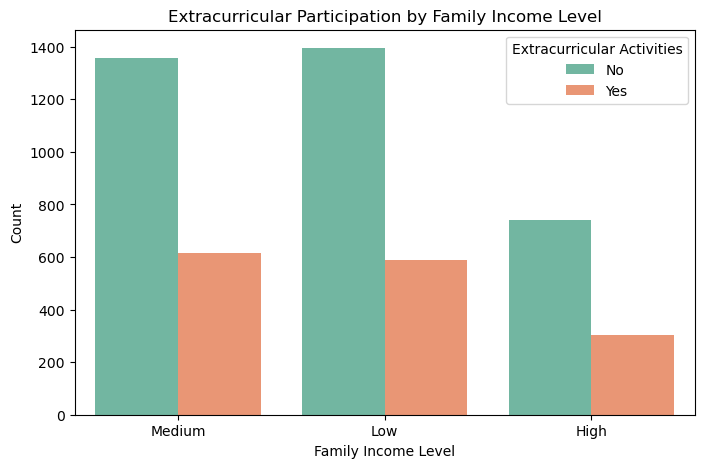

In [106]:
# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Family_Income_Level', hue='Extracurricular_Activities', palette="Set2")
plt.title("Extracurricular Participation by Family Income Level")
plt.xlabel("Family Income Level")
plt.ylabel("Count")
plt.legend(title="Extracurricular Activities")

In [108]:
# Pearson Correlation Test
corr, p_value = pearsonr(df['Study_Hours_per_Week'], df['Stress_Level (1-10)'])

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Study hours and stress levels are significantly correlated.")
else:
    print("Fail to reject H₀: No significant correlation between study hours and stress levels.")

Fail to reject H₀: No significant correlation between study hours and stress levels.


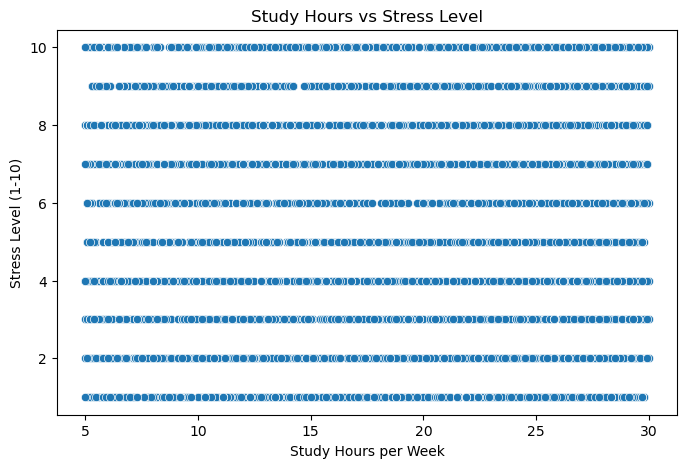

In [110]:
# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Study_Hours_per_Week", y="Stress_Level (1-10)")
plt.title("Study Hours vs Stress Level")
plt.xlabel("Study Hours per Week")
plt.ylabel("Stress Level (1-10)");

In [112]:
# Pearson Correlation Test
corr, p_value = pearsonr(df['Attendance (%)'], df['Participation_Score'])

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Attendance and participation scores are significantly correlated.")
else:
    print("Fail to reject H₀: No significant correlation between attendance and participation scores.")

Reject H₀: Attendance and participation scores are significantly correlated.


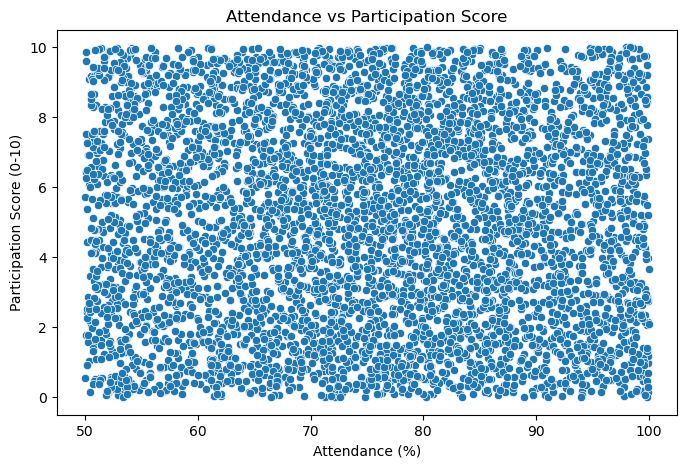

In [114]:
# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Attendance (%)", y="Participation_Score")
plt.title("Attendance vs Participation Score")
plt.xlabel("Attendance (%)")
plt.ylabel("Participation Score (0-10)");

## Insights from Visualizations and Hypothesis Testing

### 1. Score Distributions and Trends
- Midterm Score, Total Score, Participation Score, and Project Score appear nearly uniform, while Final Performance Score follow a normal distribution.
- Final Performance Score is positively influenced by Midterm Score, Assignments Average, and Projects Score, which suggests that students who perform well in earlier assessments tend to score high overall.
- There are no strong correlations (close to -1 or 1) between numerical features, except for engineered features derived from existing ones.

### 2. Gender-Based Performance
- Gender does not significantly affect student performance, as both male and female students have similar average scores across all categories.
- The gender distribution is relatively balanced, but the percentage of male students appears slightly higher.

### 3. Departmental Trends and Top Performers¶
- Most students belong to the Computer Science department, followed by Engineering. This suggests that these fields may have higher enrollment.

### 4. Family and Socioeconomic Impact¶
- Most students come from low-to-medium income families, but income level does not have a strong correlation with academic performance.
- Parent Education Level was imputed and standardized to ‘Unknown’ where applicable, ensuring consistency in data analysis.

### 5.Extracurricular Activities and Student Performance¶
- Most students do not participate in extracurricular activities, which may indicate a preference for academic focus over additional commitments.
- Participation in extracurricular activities does not show a strong impact on Final Performance Score, suggesting that students manage both activities and academics effectively.

# Insights from Visualizations and Hypothesis Testing

* Encourage Regular Attendance: Since attendance positively impacts final performance, strategies like attendance incentives or participation grades could be introduced.
 
* Enhance Study Habits: Promote study strategies that encourage students to study for at least 10-20 hours per week for better performance.

* Support for Low-Income Students: While income level is not directly correlated with performance, providingacademic resources (e.g., free tutoring or online materials) could ensure that financial limitations do not become barriers.

* Departmental Focus on Performance: Since Computer Science has a larger student population, targeted interventions could be made to enhance engagement and individualized learning approaches.

* Monitor and Improve Midterm and Assignment Scores: As these significantly impact Final Performance Score, early intervention strategies for struggling students should be in place.

* Balance Academics and Extracurricular Activities: While extracurricular participation does not strongly affect performance, structured programs that blend academic and social development should be considered.